In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt

In [3]:
(data_train, label_train), (data_test, label_test) = tf.keras.datasets.cifar10.load_data()
data_train, data_test = data_train / 255.0, data_test / 255.0 

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 183s 1us/step


In [5]:
print("Training data shape:", data_train.shape)
print("Testing data shape:", data_test.shape)

Training data shape: (50000, 32, 32, 3)
Testing data shape: (10000, 32, 32, 3)


In [7]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

C:\Users\salve\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.compile(optimizer=SGD(learning_rate=0.01), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])


In [11]:
history = model.fit(data_train, label_train, epochs=10, validation_data=(data_test, label_test))


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 53s 32ms/step - accuracy: 0.1910 - loss: 2.1933 - val_accuracy: 0.3323 - val_loss: 1.8119
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 33ms/step - accuracy: 0.3868 - loss: 1.7037 - val_accuracy: 0.4552 - val_loss: 1.5149
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 79s 31ms/step - accuracy: 0.4696 - loss: 1.4815 - val_accuracy: 0.5091 - val_loss: 1.3830
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 31ms/step - accuracy: 0.5194 - loss: 1.3591 - val_accuracy: 0.4956 - val_loss: 1.4315
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 71s 23ms/step - accuracy: 0.5463 - loss: 1.2852 - val_accuracy: 0.5555 - val_loss: 1.2737
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 39s 25ms/step - accuracy: 0.5734 - loss: 1.2142 - val_accuracy: 0.5261 - val_loss: 1.3805
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 45s 27ms/step - accuracy: 0.5961 - loss: 1.1551 - val_accuracy: 0.5985 - val_loss: 1.1432
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 79s 25ms/step - accuracy: 0.6195 -

In [13]:
test_loss, test_accuracy = model.evaluate(data_test, label_test, verbose=2)
print(f'Test accuracy: {test_accuracy:.4f}')

313/313 - 5s - 16ms/step - accuracy: 0.6314 - loss: 1.0651
Test accuracy: 0.6314


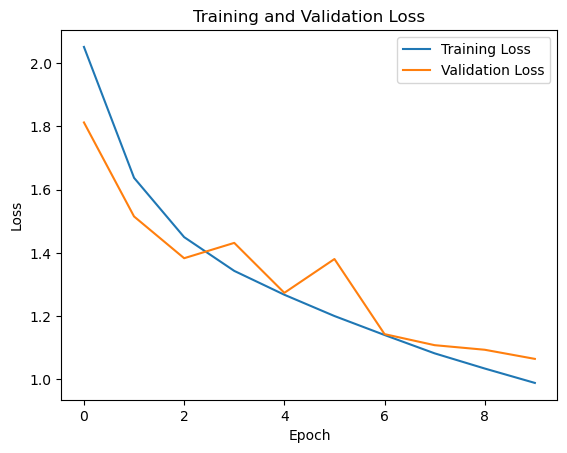

In [15]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

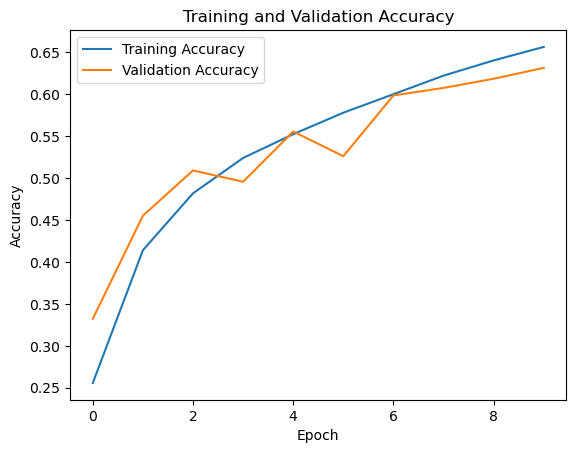

In [17]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()